In [ ]:
#!pip install tensorflow -v "2.15.0"
#!pip install tensorrt
#!pip install tensorflow-estimator -v "2.15.0"
#!pip install malaya
#!pip install matplotlib
#!pip install ipython


In [1]:
import malaya_speech
import numpy as np
from malaya_speech import Pipeline
import matplotlib.pyplot as plt
import IPython.display as ipd

2024-06-27 19:41:43.055574: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-27 19:41:43.055622: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-27 19:41:43.056830: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-27 19:41:43.064072: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-27 19:41:43.886164: W tensorflow/compiler/tf2

In [2]:
malaya_speech.tts.available_fastspeech2()

,Size (MB),Quantized Size (MB),Understand punctuation,Is lowercase
male,125,31.7,True,True
female,125,31.7,True,True
husein,125,31.7,True,True
haqkiem,125,31.7,True,True
female-singlish,125,31.7,True,True
osman,125,31.7,True,False
yasmin,125,31.7,True,False
yasmin-sdp,128,33.1,True,False
osman-sdp,128,33.1,True,False


In [3]:
def fastspeech2(
    model: str = 'mal',
    quantized: bool = False,
    pad_to: int = 8,
    **kwargs
):
    """
    Load Fastspeech2 TTS model.

    Parameters
    ----------
    model : str, optional (default='male')
        Model architecture supported. Allowed values:

        * ``'female'`` - Fastspeech2 trained on female voice.
        * ``'male'`` - Fastspeech2 trained on male voice.
        * ``'husein'`` - Fastspeech2 trained on Husein voice, https://www.linkedin.com/in/husein-zolkepli/
        * ``'haqkiem'`` - Fastspeech2 trained on Haqkiem voice, https://www.linkedin.com/in/haqkiem-daim/
        * ``'yasmin'`` - Fastspeech2 trained on female Yasmin voice.
        * ``'osman'`` - Fastspeech2 trained on male Osman voice.
        * ``'female-singlish'`` - Fastspeech2 trained on female Singlish voice, https://www.imda.gov.sg/programme-listing/digital-services-lab/national-speech-corpus

    quantized : bool, optional (default=False)
        if True, will load 8-bit quantized model.
        Quantized model not necessary faster, totally depends on the machine.
    pad_to : int, optional (default=8)
        size of pad character with 0. Increase can stable up prediction on short sentence, we trained on 8.

    Returns
    -------
    result : malaya_speech.model.synthesis.Fastspeech class
    """

In [4]:
male = malaya_speech.tts.fastspeech2(model = 'osman')

/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/malaya/tokenizer.py:214: FutureWarning: Possible nested set at position 3397
  self.tok = re.compile(r'({})'.format('|'.join(pipeline)))
/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/malaya/tokenizer.py:214: FutureWarning: Possible nested set at position 3927
  self.tok = re.compile(r'({})'.format('|'.join(pipeline)))
/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/malaya/normalizer/rules.py:204: FutureWarning: Possible nested set at position 42
  k.lower(): re.compile(_expressions[k]) for k, v in _expressions.items()
/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/malaya/normalizer/rules.py:204: FutureWarning: Possible nested set at position 3
  k.lower(): re.compile(_expressions[k]) for k, v in _expressions.items()
2024-06-27 19:41:59.735477: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA

In [5]:
# https://www.sinarharian.com.my/article/115216/BERITA/Politik/Syed-Saddiq-pertahan-Dr-Mahathir
string1 = 'Syed Saddiq berkata, mereka seharusnya mengingati bahawa semasa menjadi Perdana Menteri Pakatan Harapan'

In [6]:
def predict(
    self,
    string,
    speed_ratio: float = 1.0,
    f0_ratio: float = 1.0,
    energy_ratio: float = 1.0,
):
    """
    Change string to Mel.

    Parameters
    ----------
    string: str
    speed_ratio: float, optional (default=1.0)
        Increase this variable will increase time voice generated.
    f0_ratio: float, optional (default=1.0)
        Increase this variable will increase frequency, low frequency will generate more deeper voice.
    energy_ratio: float, optional (default=1.0)
        Increase this variable will increase loudness.

    Returns
    -------
    result: Dict[string, decoder-output, universal-output, mel-output]
    """

In [7]:
r_male = male.predict(string1)

2024-06-27 19:42:19.471410: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled


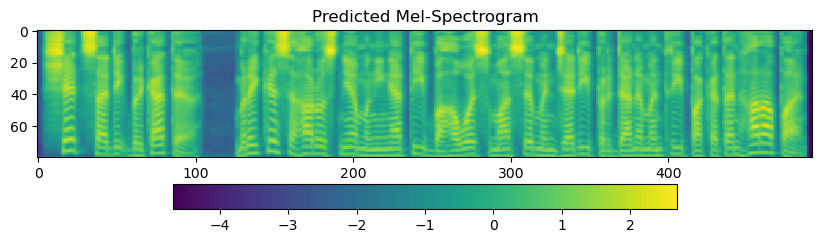

In [8]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(311)
ax1.set_title('Predicted Mel-Spectrogram')
im = ax1.imshow(np.rot90(r_male['mel-output']), aspect='auto', interpolation='none')
fig.colorbar(mappable=im, shrink=0.65, orientation='horizontal', ax=ax1)
plt.show()

In [9]:
malaya_speech.vocoder.available_hifigan()

,Size (MB),Quantized Size (MB)
male,8.8,2.49
female,8.8,2.49
universal-1024,170.0,42.90
universal-768,72.8,18.50
universal-512,32.6,8.60


In [16]:
malaya_speech.vocoder.available_melgan()

,Size (MB),Quantized Size (MB),Mel loss
male,17.3,4.53,NaN
female,17.3,4.53,NaN
husein,17.3,4.53,NaN
haqkiem,17.3,4.53,NaN
yasmin,17.3,4.53,NaN
osman,17.3,4.53,0.4819
universal,309.0,77.50,NaN
universal-1024,78.4,19.90,NaN
universal-384,11.3,3.06,NaN


In [25]:
universal_melgan = malaya_speech.vocoder.melgan(model = 'universal-384')
universal_hifigan = malaya_speech.vocoder.hifigan(model = 'universal-512')

2024-06-27 19:47:47.090009: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-27 19:47:47.090369: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-27 19:47:47.090651: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [26]:
%%time

y_ = universal_hifigan(r_male['universal-output'])
ipd.Audio(y_, rate = 22050)

CPU times: user 4.72 s, sys: 71.6 ms, total: 4.79 s
Wall time: 1.57 s


In [27]:
%%time

y_ = universal_melgan(r_male['universal-output'])
ipd.Audio(y_, rate = 22050)

CPU times: user 1.69 s, sys: 130 ms, total: 1.82 s
Wall time: 695 ms


In [14]:
p = Pipeline()
pipeline = (
    p.map(male)
    .map(lambda x: x['universal-output'])
    .map(universal_melgan)
)


In [15]:
r = p('husein wangi tetapi ketiak masam nasib baik kacak')

In [16]:
ipd.Audio(r['vocoder-melgan'], rate = 22050)

In [28]:
# https://www.hmetro.com.my/mutakhir/2020/12/657604/6-cadangan-tangani-kelemahan-kawal-selia-halal

text = 'Kuasa pensijilan halal, dan penguatkuasaan halal terletak di bawah bidang kuasa agensi yang berbeza.'

In [29]:
male_tacotron2 = malaya_speech.tts.tacotron2(model = 'osman')

2024-06-27 19:48:31.918498: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-27 19:48:31.918871: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-27 19:48:31.919131: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [30]:
%%time

r_male_tacotron2 = male_tacotron2.predict(text)

CPU times: user 3.57 s, sys: 1.43 s, total: 5 s
Wall time: 4.76 s


In [31]:
%%time

y_ = universal_melgan(r_male_tacotron2['universal-output'])


CPU times: user 1.48 s, sys: 230 ms, total: 1.72 s
Wall time: 477 ms


In [32]:
ipd.Audio(y_, rate = 22050)

In [33]:
%%time

r_male = male.predict(text)

CPU times: user 524 ms, sys: 27.4 ms, total: 551 ms
Wall time: 164 ms


In [34]:
%%time

y_ = universal_melgan(r_male['universal-output'])


CPU times: user 1.47 s, sys: 127 ms, total: 1.6 s
Wall time: 452 ms


In [35]:
ipd.Audio(y_, rate = 22050)